In [1]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Import Detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from segment_anything import sam_model_registry, SamPredictor

In [12]:
# Load the image
image_path = "Elaphoglossum_crispapalea_miersii_261b-jpg-8.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [13]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Lower threshold to capture more predictions
cfg.MODEL.DEVICE = "cpu"

# Create a predictor
predictor = DefaultPredictor(cfg)

# Perform the prediction on the image
outputs = predictor(image_rgb)

[10/07 20:25:26 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


In [14]:
outputs

{'instances': Instances(num_instances=1, image_height=749, image_width=749, fields=[pred_boxes: Boxes(tensor([[ 30.9911,  90.7999, 422.6918, 592.7448]])), scores: tensor([0.9506]), pred_classes: tensor([54]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]])])}

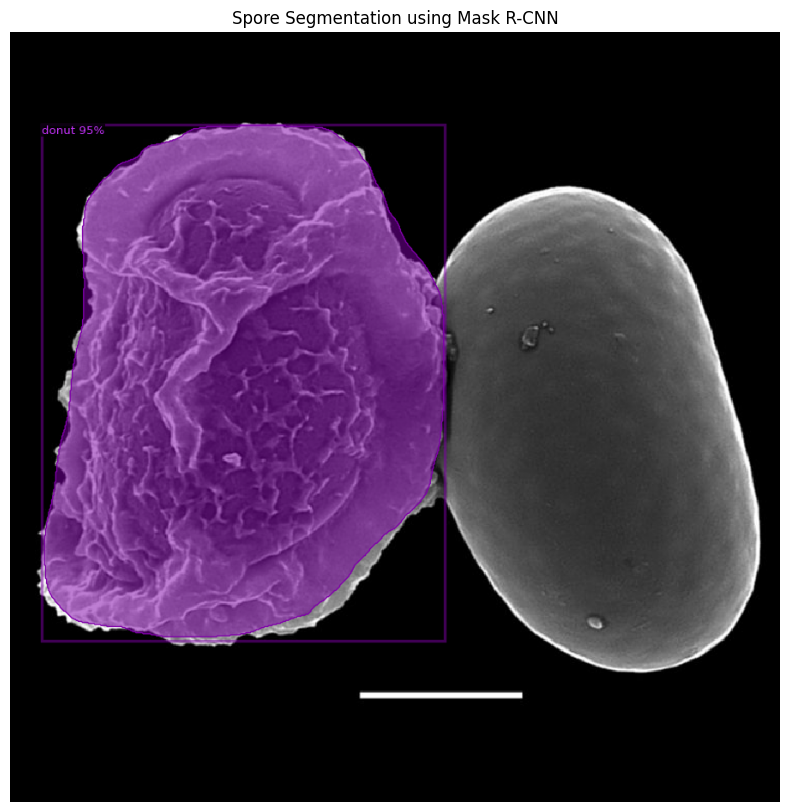

In [15]:
from detectron2.data import MetadataCatalog

# Visualize the detected objects, segmentation masks, and bounding boxes
v = Visualizer(image_rgb[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Get the final image with visualizations (bounding boxes, masks, etc.)
visualized_output = out.get_image()[:, :, ::-1]

# Display the image
plt.figure(figsize=(10,10))
plt.imshow(visualized_output)
plt.title("Spore Segmentation using Mask R-CNN")
plt.axis('off')
plt.show()

In [16]:
import torch
from torchvision import models
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segmentation_models_pytorch import Unet


/Users/oozturk/Desktop/Projects/FernSporeSegmentation/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
from cellpose import models
import matplotlib.pyplot as plt
import cv2

In [22]:

model = models.Cellpose(gpu=False, model_type='nuclei')
# Perform the segmentation (rescale if needed, adjust based on the size of spores)
masks, flows, styles, diams = model.eval([image_rgb], diameter=500, channels=[0, 0])

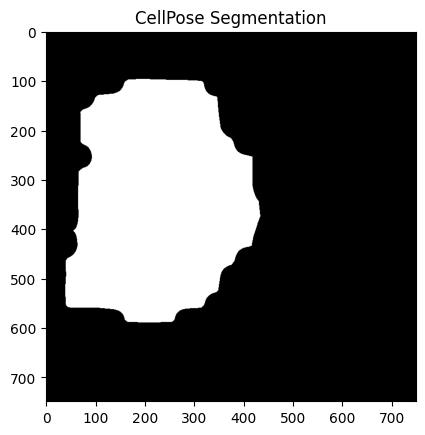

In [23]:
# Visualize the mask
plt.imshow(masks[0], cmap="gray")
plt.title("CellPose Segmentation")
plt.show()

In [ ]:
from deepcell.applications import Mesmer
import cv2
import matplotlib.pyplot as plt


In [ ]:
model = Mesmer()

# Predict segmentation mask
predictions = model.predict([image_rgb])

# Visualize
plt.imshow(predictions[0], cmap='gray')
plt.title("DeepCell Segmentation")
plt.show()